In [28]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})
from sklearn.model_selection import train_test_split
# Neuroimaging
import ants

In [6]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import ct
import mri

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
nifti_dir = "/cluster/tufts/hugheslab/datasets/OASIS-3_CT"
labels_df = ct.label_oasis3(nifti_dir)
labels_df = labels_df[labels_df["paths"].apply(lambda paths: all(path != "" for path in paths))]
print(labels_df.shape)
labels_df.head()

(662, 40)


,XNAT_CTSESSIONDATA ID,Subject,Date_x,Age_x,dcmAccessionNumber,dcmPatientId,dcmPatientName,UID,FreeSurfers,PUPs,...,acsparnt,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,paths
7,OAS30001_CT_d2438,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,184.0,NaN,NaN,2699,-261,261,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
21,OAS30001_CT_d3132,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.0,185.0,NaN,NaN,3332,-200,200,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
34,OAS30001_CT_d3746,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,192.0,NaN,NaN,3675,71,71,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
54,OAS30002_CT_d2345,OAS30002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2585,-240,240,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
59,OAS30003_CT_d2669,OAS30003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2630,39,39,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...


(512, 512, 74)


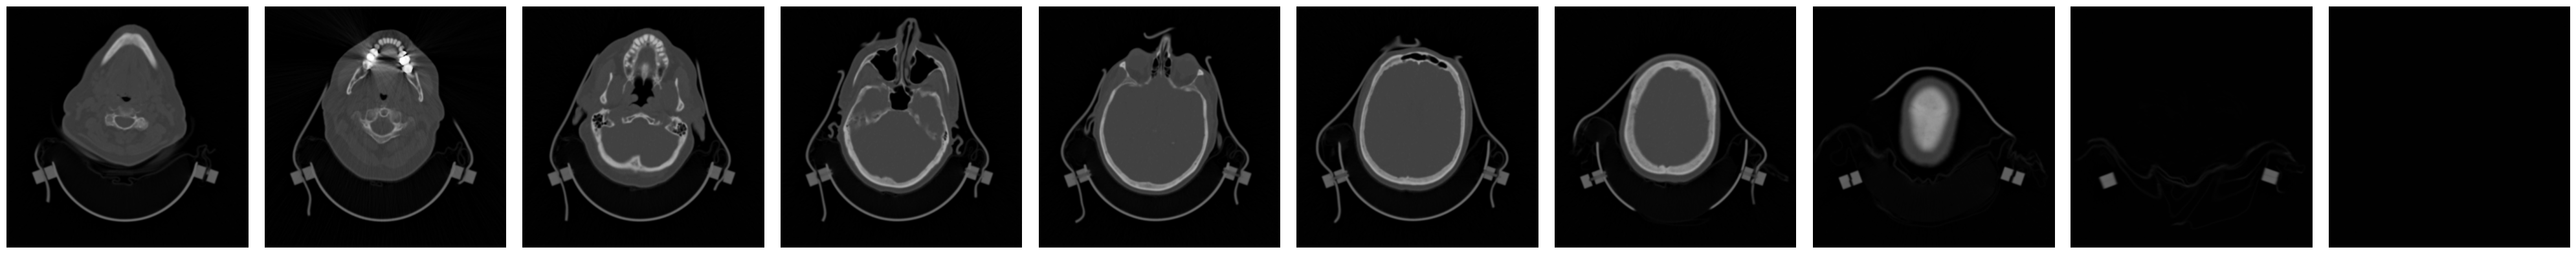

In [76]:
image = ants.image_read(labels_df.iloc[0].path).numpy()
print(image.shape)
linspace = np.linspace(0, image.shape[-1] - 1, 10).astype(int)

ncols, nrows = 10, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols,4*nrows))

for i, j in enumerate(linspace):
    axs[i].imshow(np.rot90(image[:,:,j], k=1, axes=(-2, -1)), cmap='gray', vmin=np.min(image), vmax=np.max(image))
    axs[i].set_axis_off()
    
fig.tight_layout()
plt.show()

In [80]:
labels_df = labels_df[labels_df["path"] != ""]
print(labels_df.shape)
#labels_df["path"] = labels_df["XNAT_CTSESSIONDATA ID"].apply(lambda ct_id: f"{numpy_dir}/{ct_id}.npz")
#labels_df.to_csv(f'{numpy_dir}/labels.csv', index=False)
labels_df.head()

(662, 40)


,XNAT_CTSESSIONDATA ID,Subject,Date_x,Age_x,dcmAccessionNumber,dcmPatientId,dcmPatientName,UID,FreeSurfers,PUPs,...,acsparnt,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,path
0,OAS30001_CT_d2438,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,184.0,NaN,NaN,2699,-261,261,0,/cluster/tufts/hugheslab/datasets/OASIS-3_CT/O...
1,OAS30001_CT_d3132,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.0,185.0,NaN,NaN,3332,-200,200,0,/cluster/tufts/hugheslab/datasets/OASIS-3_CT/O...
2,OAS30001_CT_d3746,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,192.0,NaN,NaN,3675,71,71,0,/cluster/tufts/hugheslab/datasets/OASIS-3_CT/O...
3,OAS30002_CT_d2345,OAS30002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2585,-240,240,0,/cluster/tufts/hugheslab/datasets/OASIS-3_CT/O...
4,OAS30003_CT_d2669,OAS30003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2630,39,39,0,/cluster/tufts/hugheslab/datasets/OASIS-3_CT/O...


In [82]:
nifti_dir = "/cluster/tufts/hugheslab/datasets/OASIS-3_MRI"
scan_types = ["T1w", "T2w"]
condition = "AND"
labels_df = mri.label_oasis3(nifti_dir, scan_types, condition)
labels_df = labels_df[labels_df["paths"].apply(lambda paths: all(path != "" for path in paths))]
print(labels_df.shape)
labels_df.head()

(1620, 38)


,MR ID,Date_x,Subject,Age_x,Scanner,Scans,FreeSurfers,PUPs,scan_day,ADRC_ADRCCLINICALDATA ID,...,acsparnt,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,paths
1,OAS30001_MR_d0129,NaN,OAS30001,65.0,3.0T,"bold(3), T1w(2), T2w(2)",1.0,NaN,129,OAS30001_ClinicalData_d0339,...,NaN,64.0,155.0,NaN,NaN,339,-210,210,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...
14,OAS30001_MR_d0757,NaN,OAS30001,67.0,3.0T,"bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2s...",1.0,NaN,757,OAS30001_ClinicalData_d0722,...,NaN,64.0,162.0,NaN,NaN,722,35,35,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...
31,OAS30001_MR_d2430,NaN,OAS30001,71.0,3.0T,"angio(1), asl(1), dwi(2), fieldmap(3), FLAIR(1...",1.0,NaN,2430,OAS30001_ClinicalData_d2699,...,NaN,64.0,184.0,NaN,NaN,2699,-269,269,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...
45,OAS30001_MR_d3132,NaN,OAS30001,73.0,3.0T,"asl(2), bold(2), dwi(2), fieldmap(3), T1w(1), ...",1.0,NaN,3132,OAS30001_ClinicalData_d3332,...,NaN,63.0,185.0,NaN,NaN,3332,-200,200,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...
58,OAS30001_MR_d3746,NaN,OAS30001,NaN,NaN,"angio(1), asl(1), bold(2), fieldmap(3), FLAIR(...",1.0,NaN,3746,OAS30001_ClinicalData_d3675,...,NaN,64.0,192.0,NaN,NaN,3675,71,71,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...


(176, 256, 256)


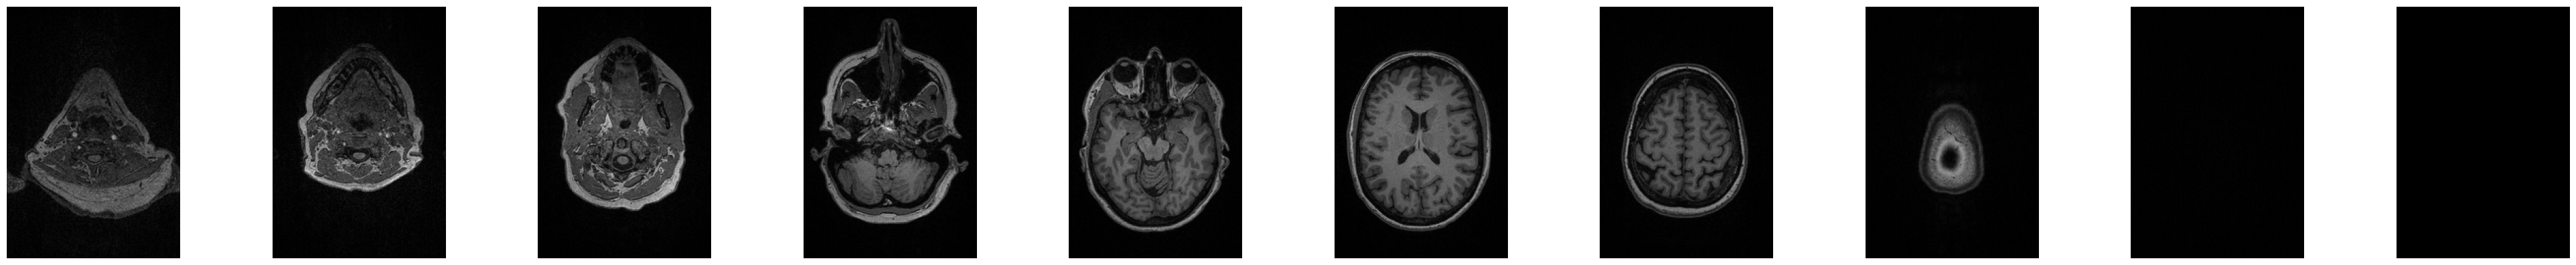

In [67]:
image = ants.image_read(labels_df.iloc[0].paths[0]).numpy()
print(image.shape)
linspace = np.linspace(0, image.shape[-1] - 1, 10).astype(int)

ncols, nrows = 10, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols,4*nrows))

for i, j in enumerate(linspace):
    axs[i].imshow(np.rot90(image[:,:,j], k=1, axes=(-2, -1)), cmap='gray', vmin=np.min(image), vmax=np.max(image))
    axs[i].set_axis_off()
    
fig.tight_layout()
plt.show()

In [68]:
numpy_dir = '/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_numpy'
starts = np.linspace(0, 1620, num=11).astype(int)[:-1]
stops = np.linspace(0, 1620, num=11).astype(int)[1:]
for start, stop in zip(starts, stops):
    print(f'    "python ../src/preprocess_oasis-3_mri.py --condition=\'AND\' --nifti_dir=\'{nifti_dir}\' --numpy_dir=\'{numpy_dir}\' --scan_type \'T1w\' \'T2w\' --start={start} --stop={stop}"')

    "python ../src/preprocess_oasis-3_mri.py --condition='AND' --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_numpy' --scan_type 'T1w' 'T2w' --start=0 --stop=162"
    "python ../src/preprocess_oasis-3_mri.py --condition='AND' --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_numpy' --scan_type 'T1w' 'T2w' --start=162 --stop=324"
    "python ../src/preprocess_oasis-3_mri.py --condition='AND' --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_numpy' --scan_type 'T1w' 'T2w' --start=324 --stop=486"
    "python ../src/preprocess_oasis-3_mri.py --condition='AND' --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_numpy' --scan_type 'T1w' 'T2w' --start=486 --stop=648"
    "python ../src/preprocess_oasis-3_mri.py --conditi

In [69]:
labels_df['path'] = labels_df['MR ID'].apply(lambda mr_id: f'{numpy_dir}/{mr_id}.npz')
#labels_df.to_csv(f'{numpy_dir}/labels.csv', index=False)
labels_df.head()

,MR ID,Date_x,Subject,Age_x,Scanner,Scans,FreeSurfers,PUPs,scan_day,ADRC_ADRCCLINICALDATA ID,...,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,paths,path
1,OAS30001_MR_d0129,NaN,OAS30001,65.0,3.0T,"bold(3), T1w(2), T2w(2)",1.0,NaN,129,OAS30001_ClinicalData_d0339,...,64.0,155.0,NaN,NaN,339,-210,210,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...,/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_...
14,OAS30001_MR_d0757,NaN,OAS30001,67.0,3.0T,"bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2s...",1.0,NaN,757,OAS30001_ClinicalData_d0722,...,64.0,162.0,NaN,NaN,722,35,35,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...,/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_...
31,OAS30001_MR_d2430,NaN,OAS30001,71.0,3.0T,"angio(1), asl(1), dwi(2), fieldmap(3), FLAIR(1...",1.0,NaN,2430,OAS30001_ClinicalData_d2699,...,64.0,184.0,NaN,NaN,2699,-269,269,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...,/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_...
45,OAS30001_MR_d3132,NaN,OAS30001,73.0,3.0T,"asl(2), bold(2), dwi(2), fieldmap(3), T1w(1), ...",1.0,NaN,3132,OAS30001_ClinicalData_d3332,...,63.0,185.0,NaN,NaN,3332,-200,200,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...,/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_...
58,OAS30001_MR_d3746,NaN,OAS30001,NaN,NaN,"angio(1), asl(1), bold(2), fieldmap(3), FLAIR(...",1.0,NaN,3746,OAS30001_ClinicalData_d3675,...,64.0,192.0,NaN,NaN,3675,71,71,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_MRI...,/cluster/tufts/hugheslab/datasets/OASIS-3_MRI_...


In [17]:
# Create folds
grouped_df = labels_df.groupby("Subject")["Alzheimer\'s"].agg(lambda x: x.mode()[0]).reset_index()
ids, id_labels = grouped_df["Subject"], grouped_df["Alzheimer\'s"]
train_and_val_ids, test_ids, train_and_val_id_labels, test_id_labels = train_test_split(ids, id_labels, test_size=1/6, random_state=42, stratify=id_labels)
train_ids, val_ids = train_test_split(train_and_val_ids, test_size=1/5, random_state=42, stratify=train_and_val_id_labels)
# Split folds
train_df = labels_df[labels_df["Subject"].isin(train_ids)]
val_df = labels_df[labels_df["Subject"].isin(val_df)]
test_df = labels_df[labels_df["Subject"].isin(test_ids)]


(601,)
(151,)
(151,)
